In [ ]:
# Libraries . I will also import them again when I run the related code
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Load Dataset from sklearn
from sklearn.datasets import load_boston


# Load Data
boston = load_boston()

# Data is in dictionary, Populate dataframe with data key
df = pd.DataFrame(boston.data)


# Columns are indexed, Fill in Column names with feature_names key
df.columns = boston.feature_names

# We need Median Value! boston.data contains only the features, no price value.

df['MEDV'] = pd.DataFrame(boston.target)

df.shape # Our dataset contains 506 data points and 14 columns

# Here is a glimpse of our data first 3 rows
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
# First replace the 0 values with np.nan values
df.replace(0, np.nan, inplace=True)

In [ ]:
# Check what percentage of each column's data is missing
df.isnull().sum()/len(df)

CRIM       0.000000
ZN         0.735178
INDUS      0.000000
CHAS       0.930830
NOX        0.000000
RM         0.000000
AGE        0.000000
DIS        0.000000
RAD        0.000000
TAX        0.000000
PTRATIO    0.000000
B          0.000000
LSTAT      0.000000
MEDV       0.000000
dtype: float64

In [ ]:
# Drop ZN and CHAS with too many missing columns
df = df.drop('ZN', axis=1)
df = df.drop('CHAS', axis=1)

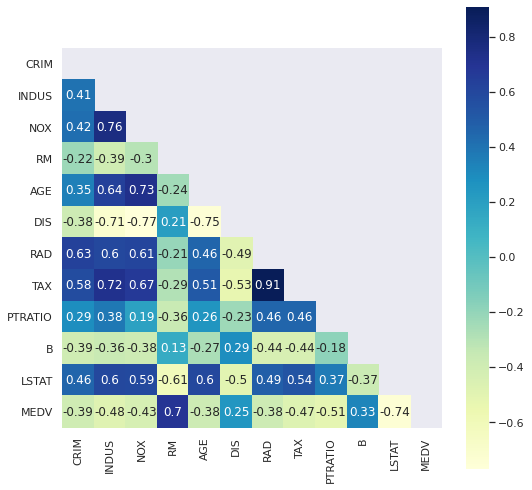

In [ ]:
import seaborn as sns

# Steps to remove redundant values
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

sns.set(rc={'figure.figsize': (8.5,8.5)})
sns.heatmap(df.corr().round(2), square=True, cmap='YlGnBu', annot=True, mask=mask);

# vmax emphasizes a color based on the gradient that you chose
# cmap is the color scheme of the heatmap
# square shapes the heatmap to a square for neatness
# annot shows the individual correlations of each pair of values
# mask removes redundacy and prevents repeat of the correlation values

In [ ]:
# drop correlated values
columns = ['TAX', 'RAD', 'NOX', 'INDUS', 'DIS']
df = df.drop(columns=columns)

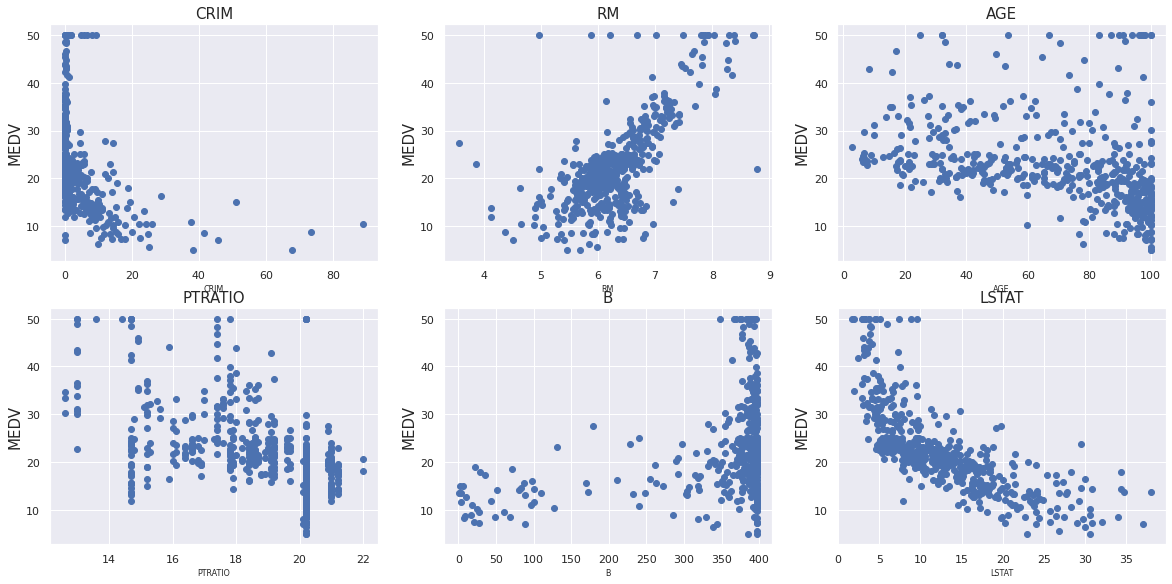

In [ ]:
# Create multiple plots
%matplotlib inline
from matplotlib import pyplot as plt
features = df.drop('MEDV', 1).columns
target = df['MEDV']
plt.figure(figsize=(20,20))
for index, feature_name in enumerate(features):
    # 4 rows of plots, 13/3 == 4 plots per row, index+1 where the plot begins
    plt.subplot(4,len(features)/2, index+1)
    plt.scatter(df[feature_name], target)
    plt.title(feature_name, fontsize=15)
    plt.xlabel(feature_name, fontsize=8) #Removed for easier view of plots
    plt.ylabel('MEDV', fontsize=15)

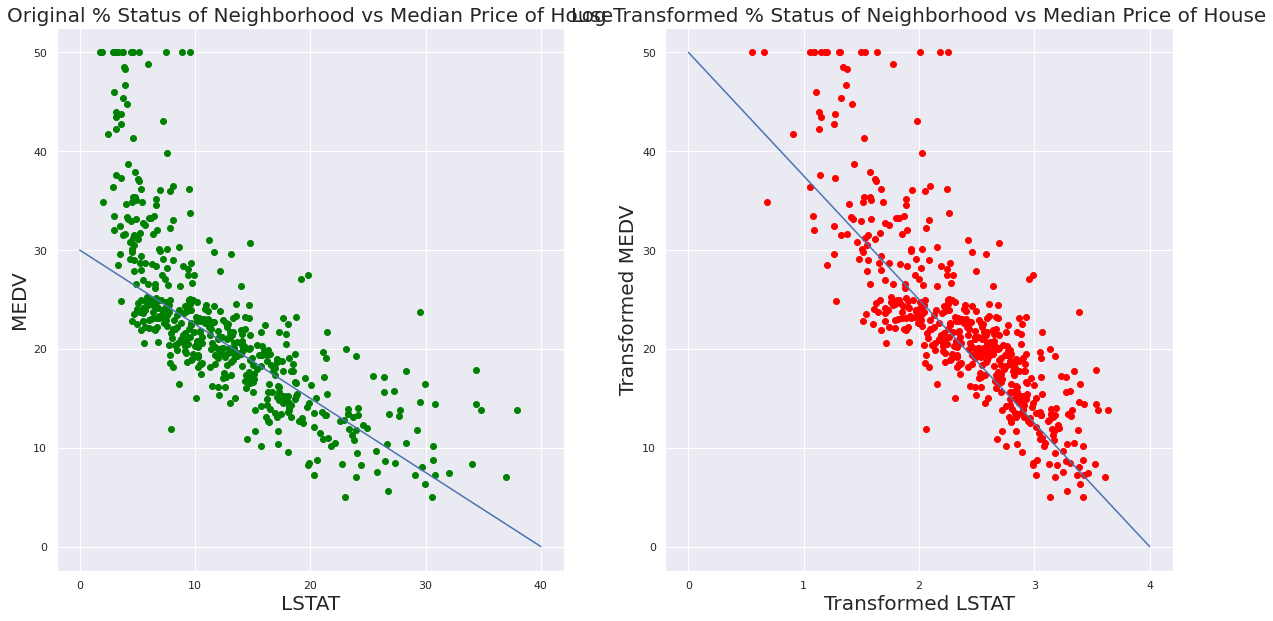

In [ ]:
import numpy as np
df["LOGLSTAT"] = df["LSTAT"].apply(np.log)
plt.figure(figsize=(20,10))

# showing plot 1
plt.subplot(1,2,1)
plt.scatter(df["LSTAT"], df['MEDV'], color='green')
plt.title('Original % Status of Neighborhood vs Median Price of House', fontsize= 20)
plt.xlabel('LSTAT',fontsize=20);
plt.ylabel('MEDV',fontsize=20);
plt.plot([0,40],[30,0])

# showing plot 2
plt.subplot(1,2,2)
plt.scatter(df["LOGLSTAT"], df['MEDV'], color='red')
plt.title('Log Transformed % Status of Neighborhood vs Median Price of House', fontsize= 20)
plt.xlabel('Transformed LSTAT',fontsize=20);
plt.ylabel('Transformed MEDV',fontsize=20);
plt.plot([0,4],[50,0])


#Apply global parameters
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

plt.show()

In [ ]:
X = df[['LOGLSTAT', 'RM']]
y = df.MEDV

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 10)

#random_state 10 for consistent data to train/test

print(X_train.shape) # 339 rows 6 features
print(X_test.shape) # 167 rows 6 features
print(y_train.shape) # 339 rows 1 feature
print(y_test.shape) # 167 rows 1 feature

(339, 2)
(167, 2)
(339,)
(167,)


In [ ]:
from sklearn.linear_model import LinearRegression
# Create LinearRegression Instance
lrm = LinearRegression()

# Fit data on to the model
lrm.fit(X_train, y_train)

# Predict
y_predicted = lrm.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error
def linear_metrics():
    r2 = lrm.score(X_test, y_test)
    rmse = (np.sqrt(mean_squared_error(y_test, y_predicted)))
    print('r-squared: {}'.format(r2))
    print('---------------------------------------')
    print('root mean squared error: {}'.format(rmse))
linear_metrics()

r-squared: 0.7155988559379332
---------------------------------------
root mean squared error: 5.214330262011093


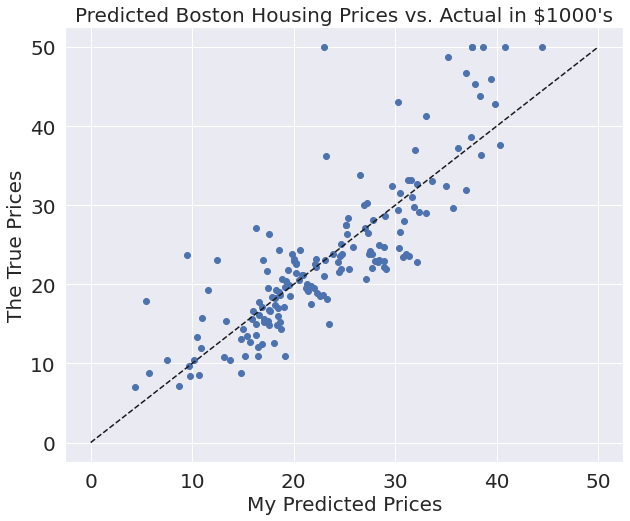

In [ ]:
# Plot my predictions vs actual

plt.figure(figsize=(10,8))
plt.scatter(y_predicted, y_test)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.ylabel('The True Prices', fontsize=20);


plt.xlabel('My Predicted Prices', fontsize=20);
plt.title("Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

Variance score: 0.7155988559379332


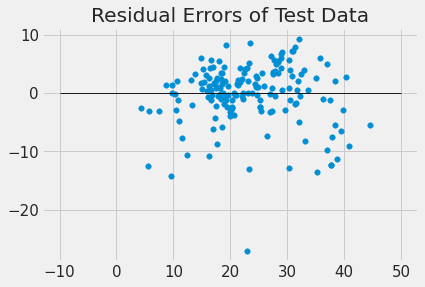

In [ ]:
#Create Residuals Function

def residuals():
    plt.style.use('fivethirtyeight')
    plt.figure(figsize=(6,4))
    plt.scatter(lrm.predict(X_test), lrm.predict(X_test) - y_test, s=30)
    plt.xlabel('')
    plt.title('Residual Errors of Test Data')
    plt.hlines(0, xmin=-10, xmax=50, linewidth=1);

# The closer to 1, the more perfect the prediction
print('Variance score: {}'.format(lrm.score(X_test, y_test)))


residuals()